# **_Computing Entropy Based on Increasing Number of Histogram Bins_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Instructions:_**

-   Building intuition in the statistical concept **ENTROPY**.

-   Reproduce a plot that looks like this:

-   y-axis: entropy.

-   x-axis: number of bins used to discretize the data.

-   Systematically change the number of bins, 4 to 50.

-   Compute entropy for each bin count, and save each entropy value.

-   Use same raw data every time.

-   If we use different data that would be a **CONFOUND**.

    -   _In math, "confound" means that a third variable, often called a "confounding variable," is influencing both the independent and dependent variables in a study, distorting the perceived relationship between them and potentially leading to inaccurate conclusions about cause and effect; essentially, it muddles the true connection between the variables you are trying to study by introducing an external factor that affects both of them._

-   Show that the estimate of entropy is highly dependent on the number of bins you get for the histogram.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Solution:_**

$$
\small
h \; = \; 2 \; \frac{\text{IQR}}{\sqrt[3]{n}}

\qquad \qquad \qquad

k \; = \;
\left\lceil
    \frac{\max(x) - \min(x)}{h}
\right\rceil
$$

$$
    \begin{gathered}
        \Large{H \; = \; - \sum_{i=1}^n \, p(x_i) \, \log_{2} (p (x_i))}
        \\ \\
        \normalsize{x = \textsf{data values}}
        \\
        \normalsize{p = \textsf{probability}}
    \end{gathered}
$$    

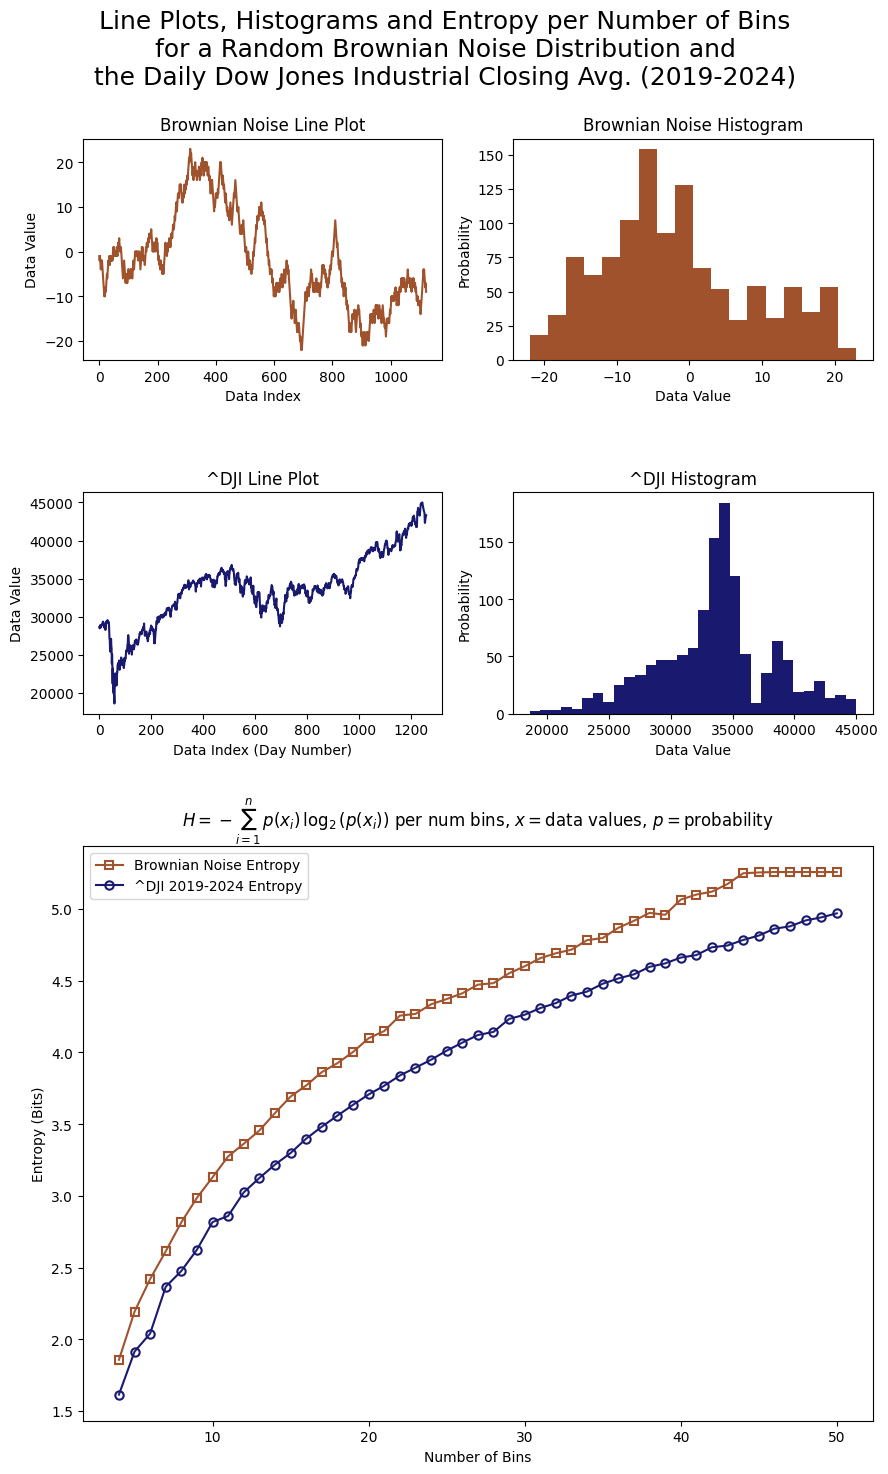

In [10]:
# Import libraries:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Import local list of Dow Jones values:
import os

from data.dow_5yr import dow_5r_vals_chron

# Instantiate distributions:
dow_5yr = np.array(dow_5r_vals_chron)
brown_noise = np.cumsum(np.sign(np.random.randn(1123)))

# Compute bin numbers manually with the Freedman-Diaconis
#  rule. Alternatively, calculate automatically when plotting 
#  histograms with kwarg `bins='fd`:
bin_width_brown = 2 * stats.iqr(brown_noise) * len(brown_noise) ** (-1 / 3)
bins_brown = np.ceil((max(brown_noise) - min(brown_noise)) / bin_width_brown)
bin_width_dow = 2 * stats.iqr(dow_5yr) * len(dow_5yr) ** (-1 / 3)
bins_dow = np.ceil((max(dow_5yr) - min(dow_5yr)) / bin_width_dow)

# Calculate entropy:
bin_counts = np.arange(4, 51)
dow_entropy_vals = np.zeros(len(bin_counts))
brown_entropy_vals = np.zeros(len(bin_counts))
for i in range(len(bin_counts)):
    # Loop and calculate Brownian histogram entropy vals:
    brown_n_per_bin, brown_bins = np.histogram(brown_noise, bin_counts[i])
    brown_probs = brown_n_per_bin / sum(brown_n_per_bin)
    brown_entropy = -sum(brown_probs * np.log2(brown_probs + np.finfo(float).eps))
    brown_entropy_vals[i] = brown_entropy
    # Loop and calculate Dow Jones histogram entropy vals:
    dow_n_per_bin, dow_bins = np.histogram(dow_5yr, bin_counts[i])
    dow_probs = dow_n_per_bin / sum(dow_n_per_bin)
    dow_entropy = -sum(dow_probs * np.log2(dow_probs + np.finfo(float).eps))
    dow_entropy_vals[i] = dow_entropy

# Create figure:
fig = plt.figure(figsize=(9, 15))
# Declare row and cols:
gs = GridSpec(4, 2, figure=fig)

# Make subplots easy to reference:
axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2:4, :]),
]

# Plot Brownian Noise line plot:
axes[0].plot(brown_noise, color='sienna')
axes[0].set_title("Brownian Noise Line Plot")

# Plot Brownian Noise histogram:
axes[1].hist(brown_noise, bins=int(bins_brown), color='sienna')
axes[1].set_title("Brownian Noise Histogram")

# Plot Dow Jones line plot:
axes[2].plot(dow_5yr, color='midnightblue')
# Plot Dow Jones histogram:
axes[3].hist(dow_5yr, bins=int(bins_dow), color='midnightblue')
axes[2].set_title("^DJI Line Plot")
axes[3].set_title("^DJI Histogram")

# Plot brown_noise entropy values:
axes[4].plot(
    bin_counts,
    brown_entropy_vals,
    marker='s',
    linestyle='-',
    color='sienna',
    markerfacecolor=(1, 1, 1, 0.05),
    markeredgecolor='sienna',
    markeredgewidth=1.5,
    label="Brownian Noise Entropy",
)
# Plot ^DJI entropy values:
axes[4].plot(
    bin_counts,
    dow_entropy_vals,
    marker='o',
    linestyle='-',
    color='midnightblue',
    markerfacecolor=(1, 1, 1, 0.05),
    markeredgecolor='midnightblue',
    markeredgewidth=1.5,
    label="^DJI 2019-2024 Entropy",
)

# Build descriptive title for entropy line plot:
ent_title = "\n$H = - \\sum_{i=1}^n \\, p(x_i) \\, \\log_{2} (p (x_i))$ per num bins"
ent_title += ", $x=$data values, $p=$probability"
axes[4].set_title(ent_title)
axes[4].legend()

# Programatically determine label names:
for i in range(len(axes)):
    if i == 2:
        axes[i].set_xlabel("Data Index (Day Number)")
        axes[i].set_ylabel("Data Value")
    elif i == len(axes) - 1:
        axes[i].set_xlabel("Number of Bins")
        axes[i].set_ylabel("Entropy (Bits)")
    elif i % 2 == 0:
        axes[i].set_xlabel("Data Index")
        axes[i].set_ylabel("Data Value")
    else:
        axes[i].set_xlabel("Data Value")
        axes[i].set_ylabel("Probability")

# Create overall figure title:
sup_title = "Line Plots, Histograms and Entropy per Number of Bins\n"
sup_title += "for a Random Brownian Noise Distribution and\nthe Daily Dow Jones Industrial Closing Avg. (2019-2024)\n"
plt.suptitle(sup_title, size=18)

# Make room:
plt.tight_layout()
# Show figure:
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<div style="border: 3px groove crimson; border-radius: 5px; width: fit-content; text-align: center; padding: 0.35em 0.75em;">
  <span style="font-size: 15px; font-weight: bold; color: crimson;">
    CONCLUSIONS
  </span>
</div>

<div style="border: 3px groove mediumaquamarine; border-radius: 5px; width: fit-content; text-align: center; padding: 0.35em 0.75em;">
  <span style="font-size: 15px; font-weight: bold; color: mediumaquamarine;">
    CORRESPONDENCE
  </span>
</div>


<div style="border: 3px groove gold; border-radius: 5px; width: fit-content; text-align: center; padding: 0.35em 0.75em;">
  <span style="font-size: 15px; font-weight: bold; color: gold;">
    RESUME 00:00
  </span>
</div>

<font size=1>

```python
# python
```

</font>

<div style="color: orangered; font-size: 2.25rem; font-weight: 400; font-style: italic; text-shadow: goldenrod 0.05rem -0.05rem 0.65rem; text-align: center;">
    Fun sample text?
</div>